In [43]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

# Read cleaned data

In [2]:
cleaned_data = pd.read_csv("../../Data/vet_compass/processed_data.csv")  

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,20,21,22,24,25,26,27,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cleaned_data.head()

,Unnamed: 0,DatabaseName,PatientNumber,ClientNumber,ConsultationNumber,ItemName,Units,ItemLabel,ClinicCode,ConsultingVet,...,eos,baso,lymph,sodium,potassium,urea,ggt,ket,nit,leu
0,0,RxNSW,7138614,NaN,13869415,NaN,NaN,NaN,1.0,WA1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,RxNSW,7737653,NaN,22925726,NaN,NaN,NaN,1.0,ZOU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,RxNSW,7738120,NaN,22934344,NaN,NaN,NaN,1.0,ZOU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,RxNSW,7745004,NaN,23043653,NaN,NaN,NaN,1.0,ZOU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,RxNSW,7742894,NaN,23043708,NaN,NaN,NaN,1.0,ZOU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Try to add Total T4 column

In [4]:
def make_regex(values):
    return f'({values})[\s\:\=\-]*(\d*\.?\/?\d*)'
# for protein\protien\protene\protine\... we need to look for +s instead of digits. like + prot... +

def add_column(df, values, colname):
    df[colname] = df.ExaminationText.str.extract(make_regex(values), expand=True, flags=re.IGNORECASE)[1]
    return df

In [5]:
colname = 'Total T4'
values = 'Total T4|TOTAL T4|T4'

In [6]:
cleaned_data = add_column(cleaned_data, values, colname)
print('\x1b[32m' + str(len(cleaned_data[colname].unique())) + " unique values found for " + colname + '\x1b[0m')

223 unique values found for Total T4


In [7]:
# force to numeric
cleaned_data[colname] = pd.to_numeric(cleaned_data[colname], errors='coerce')
print(len(cleaned_data))

722649
722649


In [21]:
cols_to_keep = ['DatabaseName', 'PatientNumber', 'ConsultingVet', 'PatientDesexed', 'DeceasedDate', 'VisitDate',
       'ConsultationDate', 'ExaminationText', 'PatientSpecies', 'PatientBreed',
       'PatientColour', 'PatientSex', 'PatientDoB', 'Insured', 'temperature',
       'HeartRate', 'BodyScore', 'DentalGrade', 'RespRate', 'PainScore', 'BP',
       'CRT', 'MMColour', 'weight_kg', 'UnifiedBreed', '25%', '50%', '75%',
       'weight_25%', 'weight_50%', 'weight_75%', 'UnifiedBodyScore', 'age',
       'DentalGrade_str', 'DentalGrade_num', 'CleanHeartRate', 'medianHR',
       'CleanRespRate', 'medianRR', 'creatinine', 'creatine kinase', 'usg',
       'phosphate', 'protein', 'albumin', 'globulin', 'urine ph',
       'triglyceride', 'calcium', 'calcium:phosphate', 'cholesterol', 'bun',
       'sap', 'salt', 'glucose', 'tp', 'pcv', 'alp', 'alt', 'acp', 'alkp',
       'bg', 'wbc', 'rcc', 'eos', 'baso', 'lymph', 'sodium', 'potassium',
       'urea', 'ggt', 'ket', 'nit', 'leu', 'Total T4']

In [23]:
# keep only relevent columns and drop duplicates
cleaned_data = cleaned_data[cols_to_keep]
cleaned_data = cleaned_data.drop_duplicates()
print(len(cleaned_data))

255258


In [28]:
len(cleaned_data['PatientNumber'].unique())

10508

In [24]:
cleaned_data[colname].unique()

array([      nan, 0.000e+00, 1.000e-01, 1.240e+02, 3.000e+00, 3.700e+01,
       2.300e+01, 1.930e+02, 4.600e+01, 8.300e+01, 2.200e+01, 2.800e+01,
       2.100e+01, 4.000e+01, 1.800e+01, 2.000e+01, 3.200e+01, 8.000e+00,
       5.000e+01, 3.500e+01, 2.400e+01, 1.500e+01, 2.900e+01, 2.600e+01,
       4.100e+01, 3.100e+01, 1.790e+02, 1.538e+02, 7.200e+01, 1.550e+02,
       1.000e+00, 4.700e+01, 5.500e+01, 1.100e+01, 6.000e+01, 5.600e+01,
       3.600e+01, 3.800e+01, 1.030e+02, 2.000e+00, 6.900e+01, 1.200e+01,
       2.000e-01, 3.900e+01, 4.800e+01, 6.300e+01, 1.350e+02, 7.560e+01,
       1.150e+02, 1.870e+02, 2.500e+01, 1.600e+02, 3.300e+01, 5.920e+01,
       4.890e+01, 5.150e+01, 2.960e+01, 3.090e+01, 4.120e+01, 1.500e-01,
       1.600e+01, 7.900e+01, 9.000e+01, 4.300e+01, 5.200e+01, 7.000e+00,
       1.900e+01, 4.900e+01, 2.700e+01, 5.900e+01, 4.770e+01, 3.400e+01,
       5.800e+01, 2.080e+01, 9.000e-01, 4.400e+01, 3.000e+01, 1.000e+01,
       3.000e-01, 1.400e+01, 8.600e+01, 4.500e+01, 

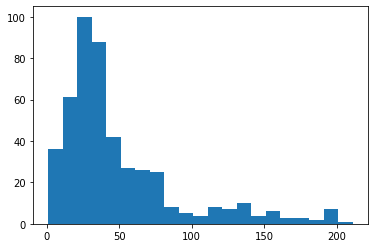

In [25]:
_=plt.hist(cleaned_data['Total T4'].dropna(), bins=np.arange(1,220,10))

some values in examination text

Total T4 (Thyroxine) 35.1 11.0 - 46.0 nmol/L 
Total T4 24 nmol/L (6-52)

In [36]:
cats_hyperthyroid = cleaned_data[cleaned_data['Total T4'] > 65.0]['PatientNumber'].unique()

In [37]:
len(cats_hyperthyroid)

88

In [38]:
cats_control = cleaned_data[cleaned_data['Total T4'] < 65.0]['PatientNumber'].unique()

In [39]:
len(cats_control)

283

In [40]:
df_cats_hyperthyroid = cleaned_data[cleaned_data['PatientNumber'].isin(cats_hyperthyroid)]

In [44]:
df_cats_hyperthyroid.sort_values(by=['PatientNumber', 'VisitDate'])

,DatabaseName,PatientNumber,ConsultingVet,PatientDesexed,DeceasedDate,VisitDate,ConsultationDate,ExaminationText,PatientSpecies,PatientBreed,PatientColour,PatientSex,PatientDoB,Insured,temperature,HeartRate,BodyScore,DentalGrade,RespRate,PainScore,BP,CRT,MMColour,weight_kg,UnifiedBreed,25%,50%,75%,weight_25%,weight_50%,weight_75%,UnifiedBodyScore,age,DentalGrade_str,DentalGrade_num,CleanHeartRate,medianHR,CleanRespRate,medianRR,creatinine,creatine kinase,usg,phosphate,protein,albumin,globulin,urine ph,triglyceride,calcium,calcium:phosphate,cholesterol,bun,sap,salt,glucose,tp,pcv,alp,alt,acp,alkp,bg,wbc,rcc,eos,baso,lymph,sodium,potassium,urea,ggt,ket,nit,leu,Total T4
224571,RxQLD,130386,FKN,1.0,NaN,2006-01-02,2006-01-02,Dose with baycox,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,42.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224573,RxQLD,130386,FKN,1.0,NaN,2006-01-09,2006-01-09,Advocate & drontal,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,49.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224575,RxQLD,130386,FKN,1.0,NaN,2006-01-11,2006-01-11,2nd dose Baycox Examine & vacc AP Vax : Feline...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,51.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224577,RxQLD,130386,DM1,1.0,NaN,2006-01-13,2006-01-13,Reason: Cat Adoption Cat Adoption Units: 1 Sal...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.120,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,53.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224580,RxQLD,130386,SEA,1.0,NaN,2006-02-16,2006-02-16,Reason: Vaccination Appointment Notes: Overdue...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,38.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,87.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
224582,RxQLD,130386,DM1,1.0,NaN,2006-03-09,2006-03-09,Reason: Blood In Poo Appointment Notes: Adopte...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.763,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,108.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224586,RxQLD,130386,DM1,1.0,NaN,2006-04-20,2006-04-20,Reason: Vaccination Subjective: all goign well...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,150.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224590,RxQLD,130386,ZOU,1.0,NaN,2006-04-27,2006-04-27,Reason: Cat Adoption Castration Laboratory: Mi...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,157.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na